# Exercises week 6

In these exercises, you will continue to work with the set of 19th century novels from Project Gutenberg, specifically the 18 texts in the directory `data/gutenberg/training/`.

The goals for today are as follows:
- Create Pandas `Series` objects from lists and dictionaries.
- Rename the labels in the index
- Sort the data
- Perform arithmetic on Series objects
- Make visualizations (bar plots)
- Advanced: smoothing

In [25]:
%matplotlib inline
import os
from glob import glob
from collections import Counter
import nltk
import pandas as pd

## Plotting the readability of 19th century fiction

### Creating Series objects

Take the readability results from week 5 (a dictionary mapping filenames to readability scores), and put them in a Series.

In [26]:
# code from week 5 here
def read_file(filename):
    with open(filename, encoding='utf8') as infile:
        contents = infile.read()
    return contents

import nltk
nltk.download('punkt')

def tokenize_sent(sent):
    return [token.lower() for token in nltk.word_tokenize(sent)
           if token not in ".,?!:;()[]''``*"]

def preprocess(text):
    return [tokenize_sent(sent) for sent in nltk.sent_tokenize(text)]

from glob import glob

from os.path import splitext, basename

corpus = {}

for filepath in glob('data/gutenberg/training/*.txt'):
    text = read_file(filepath)
    corpus[filepath] = preprocess(text)

[nltk_data] Downloading package punkt to /Users/rik/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
def readability(text): 
    total_sentences = len(text)
    total_words = 0
    total_characters = 0
    for sentence in text: 
        total_words += len(sentence)
        for word in sentence: 
            total_characters += len(word)           
    words_per_sent = total_words / total_sentences 
    chars_per_word = total_characters / total_words
    gradeLevel = 0.5 * words_per_sent + 4.71 * chars_per_word - 21.43
    return gradeLevel

In [28]:
readabilityDict = {}

for text in corpus: 
    readabilityDict[text] = round(readability(corpus[text]),2)
    

In [29]:
# create Series
readab = pd.Series(readabilityDict)
# inspect what the Series looks like
readab

data/gutenberg/training/blake-poems.txt             7.33
data/gutenberg/training/whitman-poems.txt          11.37
data/gutenberg/training/carroll-alice.txt           5.89
data/gutenberg/training/shakespeare-caesar.txt      4.26
data/gutenberg/training/whitman-leaves.txt         15.57
data/gutenberg/training/milton-paradise.txt        21.62
data/gutenberg/training/melville-piazza.txt        11.84
data/gutenberg/training/blake-songs.txt             8.44
data/gutenberg/training/austen-pride.txt            9.55
data/gutenberg/training/whitman-patriotic.txt      16.91
data/gutenberg/training/edgeworth-parents.txt       6.36
data/gutenberg/training/chesterton-thursday.txt     6.86
data/gutenberg/training/burgess-busterbrown.txt     5.34
data/gutenberg/training/chesterton-ball.txt         7.80
data/gutenberg/training/austen-emma.txt             9.45
data/gutenberg/training/shakespeare-hamlet.txt      4.23
data/gutenberg/training/austen-sense.txt           11.67
data/gutenberg/training/bryant-

### manipulating the index

Your filenames probably include the path which makes them long and cumbersome: `data/gutenberg/training/austen-sense.txt` etc.

We can change those labels by changing the `.index` of our Series object. This works as follows. Create a new list with exactly the same number of items as the original index. Finally, replace the index by assigning the new index to it. For example:

```python
data = pandas.Series([0, 1])
newindex = ['a', 'b']
data.index = newindex
```

To make our filenames shorter, we can re-use the function `remove_dir_ext` from Chapter 3 to remove the directories and the extension. Apply this function to all the items in the index. The goal is to have a `Series` object with clear and short names such as `austen-sense`.

In [50]:
# your code here
newindex = []
for filepath in glob('data/gutenberg/training/*.txt'): 
    newindex.append(splitext(basename(filepath))[0])
    
readab.index = newindex

readab

blake-poems             7.33
whitman-poems          11.37
carroll-alice           5.89
shakespeare-caesar      4.26
whitman-leaves         15.57
milton-paradise        21.62
melville-piazza        11.84
blake-songs             8.44
austen-pride            9.55
whitman-patriotic      16.91
edgeworth-parents       6.36
chesterton-thursday     6.86
burgess-busterbrown     5.34
chesterton-ball         7.80
austen-emma             9.45
shakespeare-hamlet      4.23
austen-sense           11.67
bryant-stories          5.90
dtype: float64

### Sorting data

We can sort our data to easily see which book has the lowest and highest score. Pandas provides two methods for this:

```python
data.sort_index()
data.sort_values()
```

Try them both. Do you understand the difference? Note that these methods return a *new* sorted copy. If you want to keep the sorted version, you have to assign it:

```python
data = data.sort_values()
```

Sort the Series with the readability scores by the scores.

In [31]:
# your code here

readab.sort_index()

#sorts the index 

austen-emma             9.45
austen-pride            9.55
austen-sense           11.67
blake-poems             7.33
blake-songs             8.44
bryant-stories          5.90
burgess-busterbrown     5.34
carroll-alice           5.89
chesterton-ball         7.80
chesterton-thursday     6.86
edgeworth-parents       6.36
melville-piazza        11.84
milton-paradise        21.62
shakespeare-caesar      4.26
shakespeare-hamlet      4.23
whitman-leaves         15.57
whitman-patriotic      16.91
whitman-poems          11.37
dtype: float64

In [32]:
readab.sort_values()

# sorts the values

shakespeare-hamlet      4.23
shakespeare-caesar      4.26
burgess-busterbrown     5.34
carroll-alice           5.89
bryant-stories          5.90
edgeworth-parents       6.36
chesterton-thursday     6.86
blake-poems             7.33
chesterton-ball         7.80
blake-songs             8.44
austen-emma             9.45
austen-pride            9.55
whitman-poems          11.37
austen-sense           11.67
melville-piazza        11.84
whitman-leaves         15.57
whitman-patriotic      16.91
milton-paradise        21.62
dtype: float64

Now provide a simple bar plot. A horizontal bar plot fits best, because this makes the names of the novels more readable.

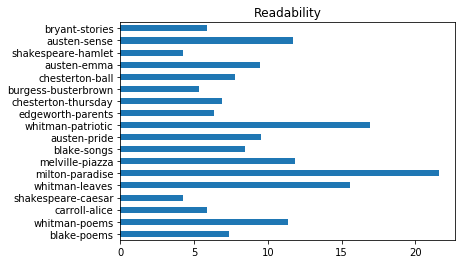

In [33]:
# your code here
readab.plot(kind ="barh", title = "Readability");

The bar plot is missing a label for the x-axis. Here's how to add it:

```python
ax = data.plot.barh()
ax.set_xlabel('My label')
```

Add the label to your plot. A good label would be "Readability (ARI)" which describes the quantity shown and the specific formula that was used.

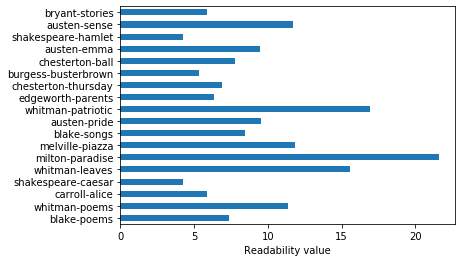

In [34]:
# your code here
ax = readab.plot.barh()
ax.set_xlabel('Readability value'); # sets label for x axis

## Relative sentiment

Use the sentiment scores you computed in the exercises of week 5. Put them in a Series, sort them, fix the index, and plot them.

In [35]:
# your code here
def sentiment(filename, positive_words, negative_words):
    posWords = read_file(positive_words).splitlines()
    negWords = read_file(negative_words).splitlines()
    sentiment = 0
    for sentence in filename:
        for word in sentence:
            if word in posWords:
                sentiment += 1
            elif word in negWords:
                sentiment -= 1
    return sentiment

sentimentDict = {}

for text in corpus: 
    sentimentDict[text] = round(sentiment(corpus[text],"data/wordList/positive-words.txt", "data/wordList/negative-words.txt"),5)

In [41]:
sentimentSeries = pd.Series(sentimentDict)
sentimentSeries.index = newindex

Now we will reconsider a question research in the previous week's exercises:

- The books have different lengths, is this a problem? If so, can you think of something to correct for this?

The answer is yes, we should fix this! We should first know the length of each book. Since the sentiment scores count tokens, the relevant length is the total number of tokens in a text.

Count the number of tokens in each file. Create a dictionary with mapping filenames to the number of tokens in that file. Put it into a Series object, just as you did for the sentiment scores.

In [40]:
# your code here

def numWords(filename):
    numWords = 0 
    for sentence in filename:
        for word in sentence:
            numWords += 1
    return numWords

In [14]:
totalWords = {}

for text in corpus: 
    totalWords[text] = numWords(corpus[text])

totalTokens = pd.Series(totalWords)
totalTokens.index = newindex  

How can we now make the sentiment scores for different texts comparable? The answer is that we should calculate the proportion of the sentiment score over the number of tokens:

$$\textrm{sentiment proportion}(\textrm{text}) = \frac{\textrm{sentiment score of text}}{\textrm{number of words in text}}$$

It turns out we can very easily compute this if we have two Series objects, as long as they have the exact same index:

```python
data1 = pandas.Series(...)
data2 = pandas.Series(...)
proportion = data1 / data2
```

Apply this to the sentiment scores and the number of tokens to obtain a 'sentiment proportion' for each novel. Also sort and plot these scores. Do you see any differences?

In [42]:
# your code here

proportion = sentimentSeries / totalTokens

proportion.index = newindex  

proportionSorted = proportion.sort_values()
sentimentSorted = sentimentSeries.sort_values()

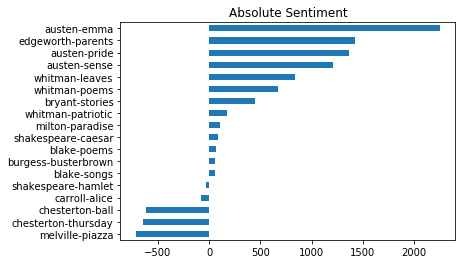

In [43]:
sentimentSorted.plot(kind="barh", title ="Absolute Sentiment");

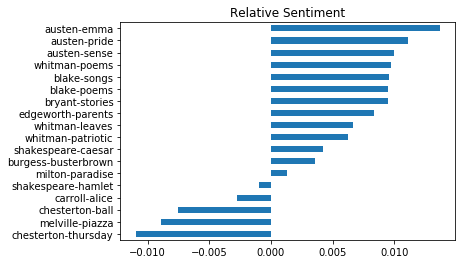

In [44]:
proportionSorted.plot(kind="barh", title ="Relative Sentiment");

### Differences between absolute and relative sentiment

Austen's Emma remains on top while Edgeworth's Parents drops 6 positions on the relative sentiment graph. At the bottom of the graph Melvill and Chestorton swap places when looking at Relative sentiment. Whitman's leaves drops to 9th place when looking at relative sentiment

# Sentiment arcs

Let's do something more advanced: we will try to plot the sentiment arc of a text. Instead of summing the sentiment scores into a single number, we will put the sentiment score of each token in a list. This will allow us to track the sentiment over time (at least over what we may call "text time").

Since this exercises is more advanced, the code is given. Read the code, run it, and try to analyze the results.

We pick Sense & Sensibility to analyze. We first load its tokens into a Series object:

In [45]:
with open('data/gutenberg/training/austen-sense.txt') as inp:
    austen = nltk.word_tokenize(inp.read().lower())

Now we will create a list which contains for each token a number:

- -1 if it is a negative word
- 1 if it is a positive word
- 0 if it is neither


In [46]:
with open('data/wordList/positive-words.txt') as inp:
    positive_words = set(inp.read().splitlines())
with open('data/wordList/negative-words.txt') as inp:
    negative_words = set(inp.read().splitlines())

def sentiment_arc(filename, positive_words, negative_words):
    with open(filename) as inp:
        tokens = nltk.word_tokenize(inp.read().lower())
    sentiment = []
    for token in tokens:
        if token in positive_words:
            sentiment.append(1)
        elif token in negative_words:
            sentiment.append(-1)
        else:
            sentiment.append(0)
    return sentiment

austen_sentim = pd.Series(sentiment_arc(
        'data/gutenberg/training/austen-sense.txt',
        positive_words, negative_words))
austen_sentim

0         0
1         0
2         0
3         0
4         0
         ..
141368    0
141369    0
141370    0
141371    0
141372    0
Length: 141373, dtype: int64

This Series provides the raw data for a "sentiment arc", but we need to zoom out from individual words to the sentiment over longer stretches of text, say chunks of a 5000 tokens.

We can do this by applying some advanced Pandas magic, namely a "rolling sum". For each token, we collect the sum of the sentiment scores for the preceding 5000 tokens:

In [47]:
austen_arc = austen_sentim.rolling(5000).sum()

 This gives us a nice plot arc:

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
141368    72.0
141369    72.0
141370    72.0
141371    72.0
141372    72.0
Length: 141373, dtype: float64

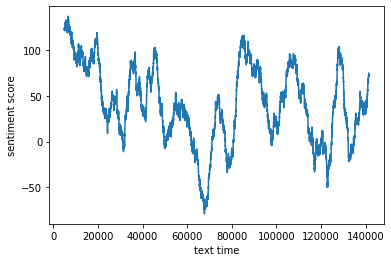

In [21]:
ax = austen_arc.plot();
ax.set_xlabel('text time')
ax.set_ylabel('sentiment score')
austen_arc

The question now is: is this plot meaningful? Try to look at one or more of the peaks, and see if you can trace it back to a particular part of the novel and perhaps particular events.

Note that the numbers on the x-axis are token numbers. If you want to took at the context around token 10000 for example, you could do so as follows:

In [22]:
print(' '.join(austen[10000:10100]))

a very snug little cottage . i could wish the stairs were handsome . but one must not expect every thing ; though i suppose it would be no difficult matter to widen them . i shall see how much i am before-hand with the world in the spring , and we will plan our improvements accordingly . '' in the mean time , till all these alterations could be made from the savings of an income of five hundred a-year by a woman who never saved in her life , they were wise enough to be contented with the


### Dips
Since Austen seemed to have the highest sentiment score, I thought the dips might be more interesting than the peaks. Overall the plot starts on a high and ends on a positive note although scoring lower than the beginning. 

The lowest peak occurs between the 60,000$^{th}$ and 80,000$^{th}$ token. 

In [23]:
print(' '.join(austen[65000:75000]))

speak , seemed to feel all the tenderness of this behaviour , and after some time thus spent in joint affliction , she put all the letters into elinor 's hands ; and then covering her face with her handkerchief , almost screamed with agony . elinor , who knew that such grief , shocking as it was to witness it , must have its course , watched by her till this excess of suffering had somewhat spent itself , and then turning eagerly to willoughby 's letter , read as follows : `` bond street , january . `` my dear madam , `` i have just had the honour of receiving your letter , for which i beg to return my sincere acknowledgments . i am much concerned to find there was anything in my behaviour last night that did not meet your approbation ; and though i am quite at a loss to discover in what point i could be so unfortunate as to offend you , i entreat your forgiveness of what i can assure you to have been perfectly unintentional . i shall never reflect on my former acquaintance with your f

Looking at the text surrounding that dip, a character named John Willoughby has sent a letter which has not been well received as it exhibits ungentlemanly behaviour. 

The second lowest peak occurs just after the 120,000$^{th}$ token mark:

In [24]:
print(' '.join(austen[120000:125000]))

and therefore so tediously -- no creature to speak to -- my own reflections so cheerful -- when i looked forward every thing so inviting ! -- when i looked back at barton , the picture so soothing ! -- oh , it was a blessed journey ! '' he stopped . `` well , sir , '' said elinor , who , though pitying him , grew impatient for his departure , `` and this is all ? '' `` ah ! -- no , -- have you forgot what passed in town ? -- that infamous letter -- did she shew it you ? '' `` yes , i saw every note that passed . '' `` when the first of hers reached me ( as it immediately did , for i was in town the whole time , ) what i felt is -- in the common phrase , not to be expressed ; in a more simple one -- perhaps too simple to raise any emotion -- my feelings were very , very painful. -- every line , every word was -- in the hackneyed metaphor which their dear writer , were she here , would forbid -- a dagger to my heart . to know that marianne was in town was -- in the same language -- a thu

Here, Willoughby talks about how Marianne still cares for him but he is to be married. 